<a href="https://colab.research.google.com/github/snehachavhan2004/OIBSIP-task-3/blob/main/Car_price_prediction(task3).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
car=pd.read_csv('/content/car data.csv')

In [ ]:
car.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [ ]:
car.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [ ]:
car.shape

(301, 9)

In [ ]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [ ]:
car.isnull().sum()

,0
Car_Name,0
Year,0
Selling_Price,0
Present_Price,0
Driven_kms,0
Fuel_Type,0
Selling_type,0
Transmission,0
Owner,0


In [ ]:
car.duplicated().sum()

2

In [ ]:
car.drop_duplicates(inplace=True)

In [ ]:
car.duplicated().sum() #for verifing it

0

In [ ]:
#To see the
import plotly.express as px
fig=px.scatter(car,x='Year',y='Present_Price',color="Car_Name")
fig.show()

In [ ]:
#To see the price as per kms
fig=px.scatter(car,x='Present_Price',y='Driven_kms',color="Car_Name")
fig.show()

In [ ]:
#the see the distribution of each price
fig=px.histogram(car,x='Present_Price')
fig.show()

In [ ]:
fig=px.box(car,x="Fuel_Type",y="Selling_Price")
fig.show()

In [ ]:
avg_price=car.groupby('Car_Name')['Present_Price'].mean().sort_values(ascending=False).reset_index()
fig=px.bar(avg_price,x="Car_Name",y="Present_Price",title='Average Car Price by Brand')
fig.show()

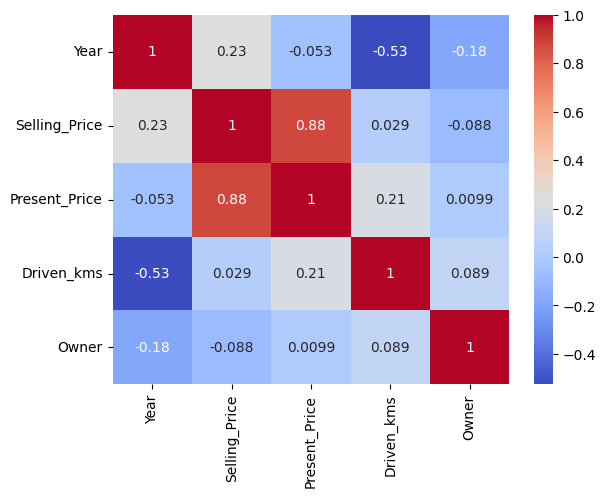

In [ ]:
sns.heatmap(car.select_dtypes(include=np.number).corr(),annot=True,cmap="coolwarm")
plt.show()

In [ ]:
car.Fuel_Type.value_counts()  #for verifing it and see the distribution

,count
Fuel_Type,
Petrol,239
Diesel,58
CNG,2


In [ ]:
car.Selling_type.value_counts()

,count
Selling_type,
Dealer,193
Individual,106


In [ ]:
car.Transmission.value_counts()

,count
Transmission,
Manual,260
Automatic,39


In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
columns=['Fuel_Type','Transmission','Selling_type']
for i in columns:
  car[i]=le.fit_transform(car[i])

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Assuming 'car' is your DataFrame
x = car.drop(['Car_Name', 'Selling_Price'], axis=1)
y = car['Selling_Price']

# Split the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [ ]:
y_pred=model.predict(x_test)

In [ ]:
mse_lr=mean_squared_error(y_test,y_pred)
r2_lr=r2_score(y_test,y_pred)
print("Mean Squared Error:",mse_lr)
print("R-squared:",r2_lr)

Mean Squared Error: 6.675444100493375
R-squared: 0.7409934356413107


In [ ]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(x_train,y_train)

RandomForestRegressor()

In [ ]:
fig=px.scatter(x=y_test,y=y_pred)
fig.show()

In [ ]:
y_pred=model.predict(x_test)

In [ ]:
mse_rf=mean_squared_error(y_test,y_pred)
r2_rf=r2_score(y_test,y_pred)
print("Mean Squared Error:",mse_rf)
print("R-squared:",r2_rf)

Mean Squared Error: 6.35667171682866
R-squared: 0.7533617722886546


In [ ]:
fig=px.scatter(x=y_test,y=y_pred)
fig.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
model=DecisionTreeRegressor()
model.fit(x_train,y_train)

DecisionTreeRegressor()

In [ ]:
y_pred=model.predict(x_test)

In [ ]:
mse_dt=mean_squared_error(y_test,y_pred)
r2_dt=r2_score(y_test,y_pred)
print("Mean Squared Error:",mse_dt)
print("R-squared:",r2_dt)

Mean Squared Error: 6.35667171682866
R-squared: 0.7533617722886546


In [ ]:
#Summary and Comparison Table
model_results = {
    'Model': ['Linear Regression', 'Decision Tree', 'Random Forest'],
    'MSE': [mse_lr,  mse_dt, mse_rf],
    'R²': [r2_lr,  r2_dt, r2_rf]
}
# Create a DataFrame for comparison
comparison_df = pd.DataFrame(model_results)

# Display the Model Comparison Table
print("Model Comparison Table:")
print(comparison_df)

# Identify the best model based on the highest R² and the lowest MSE
best_model_idx = comparison_df['R²'].idxmax()
best_model_name = comparison_df.loc[best_model_idx, 'Model']
best_model_mse = comparison_df.loc[best_model_idx, 'MSE']
best_model_r2 = comparison_df.loc[best_model_idx, 'R²']

# Print the summary of the best model
print("\nBest Model Summary:")
print(f"Best Model: {best_model_name}")
print(f"MSE: {best_model_mse}")
print(f"R²: {best_model_r2}")

Model Comparison Table:
               Model       MSE        R²
0  Linear Regression  6.675444  0.740993
1      Decision Tree  6.356672  0.753362
2      Random Forest  6.356672  0.753362

Best Model Summary:
Best Model: Decision Tree
MSE: 6.35667171682866
R²: 0.7533617722886546


In [5]:
#finalize model training
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

car=pd.read_csv('/content/car data.csv')

car.drop_duplicates(inplace=True)

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
columns=['Fuel_Type','Transmission','Selling_type']
for i in columns:
  car[i]=le.fit_transform(car[i])

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

x = car.drop(['Car_Name', 'Selling_Price'], axis=1)
y = car['Selling_Price']

# Split the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

model=DecisionTreeRegressor()
model.fit(x_train,y_train)

y_pred=model.predict(x_test)

print(y_pred)

mse_dt=mean_squared_error(y_test,y_pred)
r2_dt=r2_score(y_test,y_pred)
print("Mean Squared Error:",mse_dt)
print("R-squared:",r2_dt)


[ 7.25  9.1   0.45  5.95 14.5   5.3   7.45  1.2   7.25  0.15  9.25  0.25
  0.27  0.48  4.75  4.75  0.6   1.05 19.75  0.55  0.55  3.    5.85  1.95
  6.75  8.65  8.5   1.1   4.5   5.    4.    4.4   6.75  2.7   4.    6.45
  1.15  0.1   1.1  14.5   5.2   8.5   1.05  3.49  0.55  0.2   9.15  5.3
  4.4   0.15  0.65  0.3  16.   10.25  8.5   8.25  3.1   3.9  11.25  7.05]
Mean Squared Error: 10.4475
R-squared: 0.5946380434917564


In [7]:
input_data_model=pd.DataFrame(
    [[2015,11.12,18796,2,0,1,0]],
    columns=['Year','Present_Price','Driven_kms','Fuel_Type','Selling_type','Transmission','Owner']
)

In [8]:
input_data_model

,Year,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,2015,11.12,18796,2,0,1,0


In [9]:
model.predict(input_data_model)

array([6.7])

In [10]:
y_train.head(1) #for verifing it

6    6.75
Name: Selling_Price, dtype: float64

In [11]:
import pickle as pk

In [13]:
pk.dump(model,open('model.pk1','wb'))